#Author: Md Mintu Miah, PhD; Post Doctoral Researcher at PATH, UC Berkeley
#Project: Contract 65A0911: Complete Cities: Bicycle Network Connectivity Evaluation Methodology
#PI: Alex Skabardonis, PhD, Professor, UC Berkeley

In [1]:
#!pip install pybna # if you need to install please remove comment out

In [1]:
# if you need to install please remove comment out
#!pip install -r requirements.txt
#!pip install SQLAlchemy
#!pip install momepy

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections.abc import Mapping
from distutils.version import LooseVersion
from pybna import Importer
import geopandas as gpd
import pybna

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pybna\dbutils.py:13: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://s

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io

In [4]:
from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import Point
from functools import reduce
#import matplotlib.pyplot as plt  ## not needed
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import csv
from time import time
import time
from geopandas import GeoSeries, GeoDataFrame

In [5]:
#conda install arcpy=3.0 -c esri

In [9]:
#import arcpy
#from arcpy import env

In [6]:
%%time
# Import Configuration file
i = pybna.Importer(config="config.yaml")
# Import Study Area boundary shape file
i.import_boundary('geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp', overwrite=True)
# Mention the State fips, for California it is 6
i.import_census_blocks(fips=6, overwrite=True)
i.import_census_jobs("received.neighborhood_census_block_jobs",state="CA", overwrite=True)

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\yaml\__init__.py:125: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  return load(stream, SafeLoader)


Connecting to database
Copying boundary to database
Loading boundary


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


Loading data from http://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_06_pophu.zip
Filtering blocks to boundary
Filtering out water
Copying blocks to database
Loading data for state CA
No data for state CA for year 2020. Checking previous year.


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pybna\importer.py:351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs = jobs_main.append(jobs_aux,ignore_index=True)


Copying jobs to database
CPU times: total: 3min 22s
Wall time: 14min 53s


In [7]:
%%time
i.import_osm_network(overwrite=True)

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


Copying OSM ways to database
Copying OSM intersections to database
Processing OSM data in database
CPU times: total: 37min 3s
Wall time: 49min 21s


In [8]:
%%time
#Increase the timeout in your importer file if your computer is weak to avoid error
#i.import_osm_destinations(overwrite=True)


CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
%%time
# stress
s = pybna.Stress(config='config.yaml')
s.segment_stress()
s.crossing_stress()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\yaml\__init__.py:125: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  return load(stream, SafeLoader)


Connecting to database
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
  ....forward
  ....backward
CPU times: total: 688 ms
Wall time: 8min 24s


In [10]:
#%%time
# connectivity
#bna = pybna.pyBNA(config='config.yaml')
#bna.calculate_connectivity()

In [11]:
#%%time
# scores
#bna.score("myschema.my_scores_table")
#bna.aggregate("myschema.my_aggregate_score_table")

In [6]:
# Read the LTS shape file
lts=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/neighborhood_ways.shp")
lts = lts.rename(columns={'OSMID':'osmid'})
lts=lts.rename({'INTERSECTI':'u', 'INTERSE_01':'v'}, axis='columns')
lts['length']=lts.length
lts.head()

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (91536.677 -976.326, 91560.948 -973...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (108350.827 -24102.437, 108425.349 ...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (94730.324 -23220.754, 94768.157 -2...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (65934.473 27367.107, 65935.819 273...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (41921.847 57781.540, 41918.170 577...",3.697954


In [26]:
lts.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Lets calculate the slope for each link

In [6]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

EPSG:4269


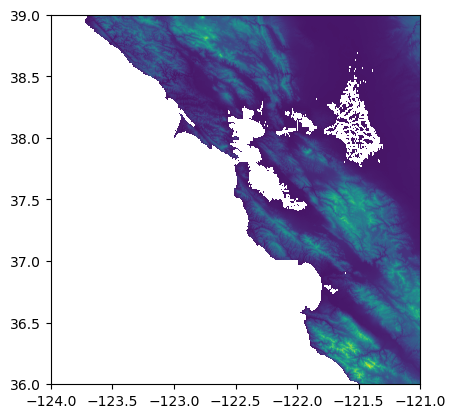

<AxesSubplot: >

In [7]:
# Open the raster image
barea_slope = rasterio.open('H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Slope/Slope/cslope11.img')
print(barea_slope.crs)
rioplot.show(barea_slope)

In [8]:
# only band is elev value (in m)
band1 = barea_slope.read(1, masked=True)  # mask noData cells [shouldn't be necessary on land]
stats = {'min': band1.min(), 'mean': band1.mean(), 'max': band1.max()}
print(stats)

{'min': -104, 'mean': 236.201825257043, 'max': 1784}


In [9]:
# Reproject the geometries by replacing the values with projected ones
lts_new = lts.to_crs(epsg=4326)
lts_new.head(10)

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954
5,955824,{502817925},tertiary,None,ft,124992,124987,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.56019 38.01438, -122.55981 38...",35.877744
6,463165,{758004215},residential,None,ft,72994,72996,NaN,NaN,None,...,None,?,?,1.0,1.0,NaN,1.0,None,"LINESTRING (-121.95331 37.76988, -121.95271 37...",88.638366
7,513383,{792316869},secondary,None,ft,164789,165035,NaN,30.0,None,...,None,?,?,4.0,NaN,NaN,NaN,None,"LINESTRING (-122.05952 37.93424, -122.05967 37...",61.709085
8,67412,{393791123},tertiary,None,ft,295993,295988,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,1.0,None,"LINESTRING (-121.77421 37.23356, -121.77512 37...",100.762064
9,180018,{417891815},primary,None,ft,325209,325205,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,NaN,None,"LINESTRING (-121.90356 37.34089, -121.90344 37...",10.743065


In [10]:
# get the slope for each link of the network
%time
lts_new
# First identify the starting and ending node of each link
lts_new['starting point'] = None
lts_new['ending point'] = None

for index, row in lts_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    lts_new.at[index,'starting point'] = Point(first_coord)
    lts_new.at[index,'ending point'] = Point(last_coord)
    lts_new

CPU times: total: 0 ns
Wall time: 0 ns


In [11]:
lts_new.head(5)

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,?,4.0,NaN,NaN,3.0,None,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001)
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661)
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632)
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001)
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,?,1.0,NaN,NaN,NaN,None,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339)


In [12]:
#lts_new['FUNCTIONAL'].unique()

<AxesSubplot: >

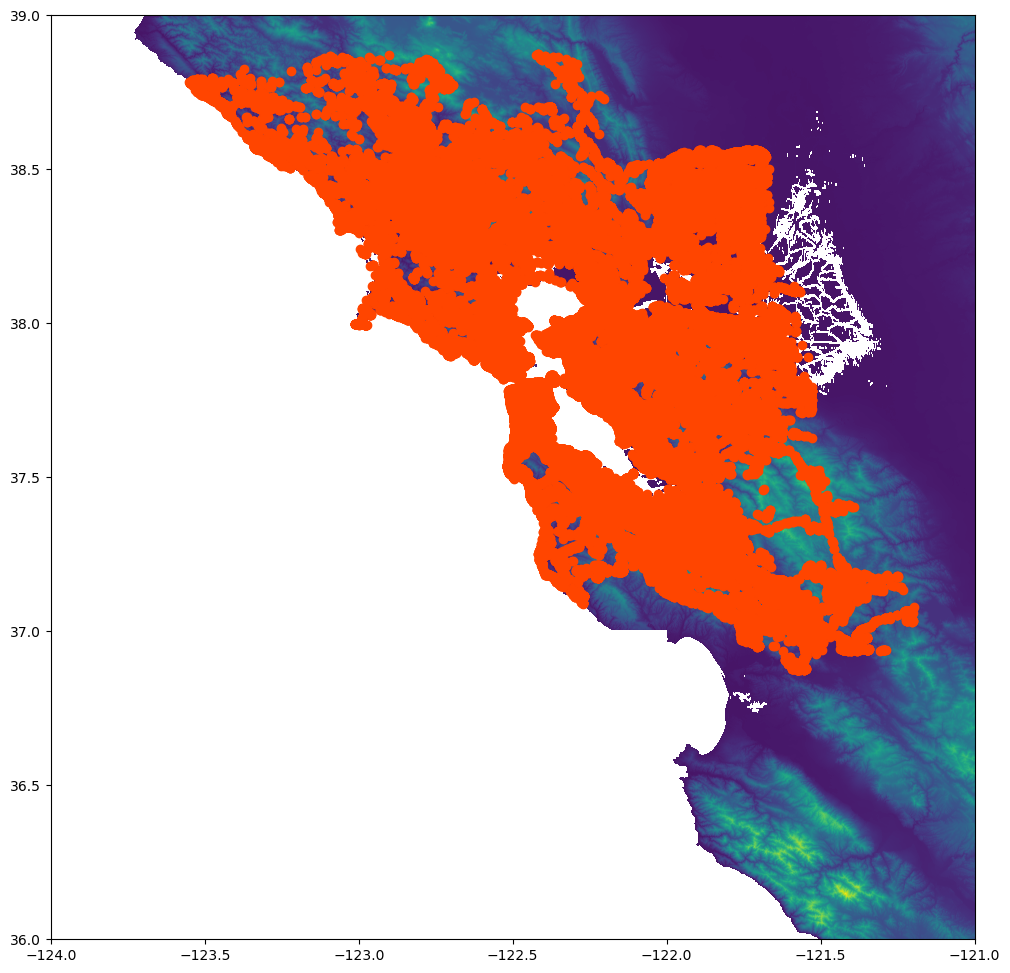

In [13]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
lts_new.boundary.plot(ax=ax, color='orangered')
show(barea_slope, ax=ax)

In [14]:
# Calculate each link starting lat and long
sf1=lts_new.loc[:,["ROAD_ID","starting point"]]
sf1.columns=["ROAD_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["ROAD_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

,ROAD_ID,geometry,start_lon,start_lat
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330


In [15]:
# Calculate each link starting elevation
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = barea_slope.index(x,y)
sf2["starting_ele"]=barea_slope.read(1)[row,col]

In [16]:
sf2.head()

,ROAD_ID,geometry,start_lon,start_lat,starting_ele
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11


In [17]:
%%time
# Calculate each link end point elevation
ef1=lts_new.loc[:,["ROAD_ID","ending point"]]
ef1.columns=["ROAD_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["ROAD_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

CPU times: total: 6.06 s
Wall time: 6.07 s


,ROAD_ID,geometry,end_lon,end_lat
0,111276,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963
1,162454,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766
2,165633,POINT (-121.9223468 37.3233632),-121.922347,37.323363
3,888344,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167
4,923150,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334


In [18]:
%%time
# Calculate the each link end elevation
ef2["ending_ele"]= None
#point in test['geometry']:
x = ef2["end_lon"]
y = ef2["end_lat"]
row, col = barea_slope.index(x,y)
ef2["ending_ele"]=barea_slope.read(1)[row,col]

CPU times: total: 4.72 s
Wall time: 4.72 s


In [19]:
lts_new.shape,sf2.shape,ef2.shape

((505029, 29), (505029, 5), (505029, 5))

In [20]:
%%time
# Calculate the slope for each link
from functools import reduce
barea_all=[sf2,ef2,lts_new]

barea_all1= reduce(lambda  left,right: pd.merge(left,right,on=['ROAD_ID'],
                                            how='outer'), barea_all).fillna('0')
barea_all1["slope"]=abs((barea_all1['starting_ele']-barea_all1['ending_ele'])/barea_all1['length'])*100
barea_all1=barea_all1.drop_duplicates(subset=['ROAD_ID'], keep='first')
barea_all1.head()

CPU times: total: 3.17 s
Wall time: 3.17 s


,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963,13,{31439803},...,4.0,0,0,3.0,0,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001),0.000000
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766,113,{93291777},...,4.0,1.0,0,1.0,0,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661),3.952431
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36,POINT (-121.9223468 37.3233632),-121.922347,37.323363,36,{184388728},...,4.0,1.0,0,1.0,0,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632),0.000000
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167,5,{53726448},...,4.0,1.0,0,1.0,0,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001),0.000000
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334,11,{655711604},...,1.0,0,0,0,0,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339),0.000000


In [21]:
barea_all1.shape

(505029, 38)

In [22]:
barea_all1['slope'].describe()

count    5.050290e+05
mean     1.737539e+06
std      1.662065e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.423149e+00
max      4.825674e+10
Name: slope, dtype: float64

<AxesSubplot: >

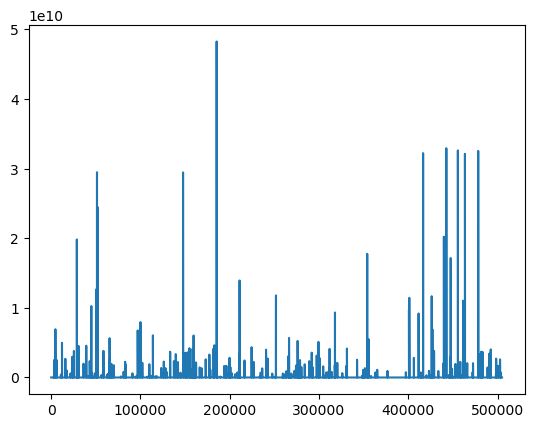

In [23]:
barea_all1.slope.plot()

In [24]:
# It seems that some of the slope is abnormal, due to mountain effect.

In [25]:
# Lets see the number of links that have slope greater than 100%
abnormal_slope=barea_all1.loc[barea_all1['slope']>100]
abnormal_slope.shape

(236, 38)

In [30]:
# Save thhe Slope file for future use
barea_alls=barea_all1.drop(['geometry_x','geometry_y','starting point','ending point'],axis=1)
barea_alls = gpd.GeoDataFrame(barea_alls, crs="EPSG:4326", geometry='geometry')
barea_alls.head()

,ROAD_ID,start_lon,start_lat,starting_ele,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,slope
0,111276,-121.957493,37.523942,13,-121.957218,37.523963,13,{31439803},tertiary,0,...,?,?,4.0,0,0,3.0,0,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,0.000000
1,162454,-121.769183,37.314641,110,-121.768341,37.314766,113,{93291777},tertiary,0,...,?,?,4.0,1.0,0,1.0,0,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,3.952431
2,165633,-121.922774,37.323369,36,-121.922347,37.323363,36,{184388728},primary,0,...,?,?,4.0,1.0,0,1.0,0,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,0.000000
3,888344,-122.246418,37.780160,5,-122.246403,37.780167,5,{53726448},tertiary,0,...,?,?,4.0,1.0,0,1.0,0,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,0.000000
4,923150,-122.519252,38.054330,11,-122.519294,38.054334,11,{655711604},residential,0,...,?,?,1.0,0,0,0,0,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,0.000000


In [1]:
# Save the Alamenda County node level Connectivity
crs = {'init': 'epsg:4326'}
gdf_al = gpd.GeoDataFrame(barea_alls, crs=crs, geometry = 'geometry')
gdf_al.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay_Area_Slope.shp")

NameError: name 'gpd' is not defined

# Apply the slope effects for the LTS

In [5]:
# Read Slope data
barea_all1=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay_Area_Slope.shp")

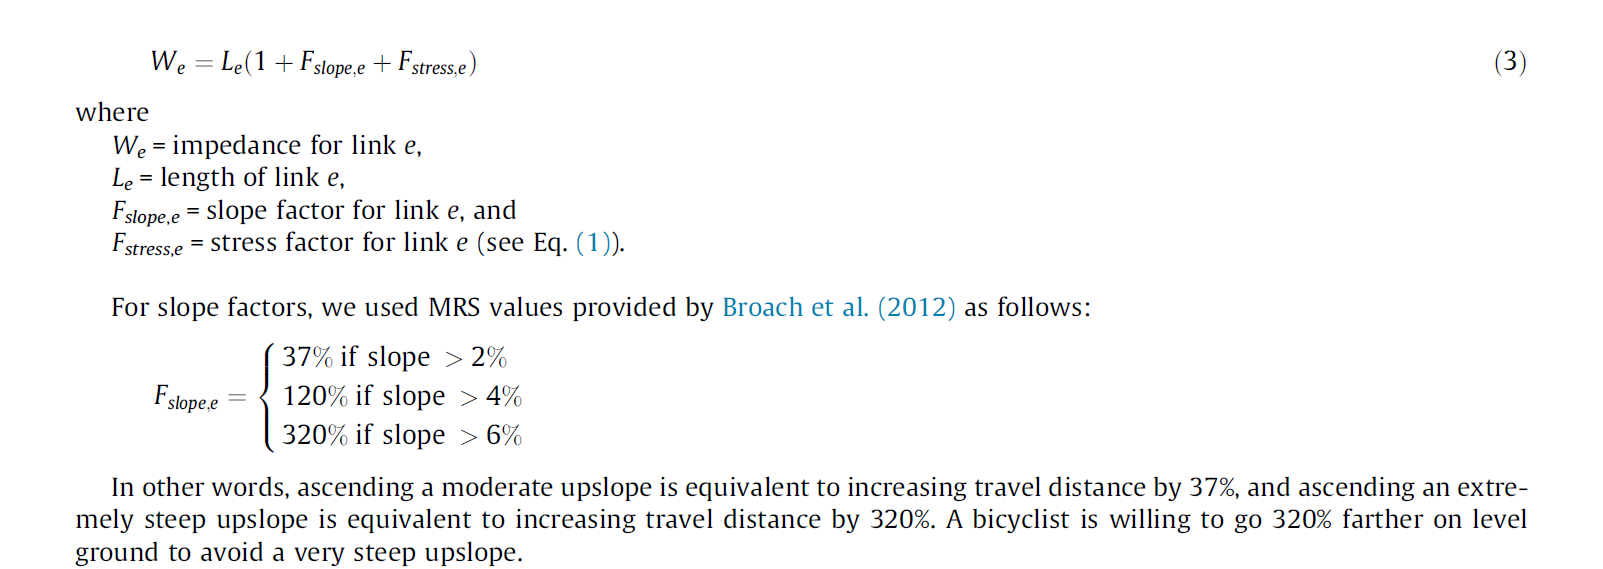

In [6]:
# write a slope impedance function
def slope_correction(length,FT_SEG_STR,slope):
    if slope <=2:
        return length*(1+FT_SEG_STR)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+FT_SEG_STR)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+FT_SEG_STR)
    else:
        return length*(1+3.20+FT_SEG_STR)

In [7]:
#barea_all1['FT_SEG_STR'].astype(str).astype(int)
barea_all1['FT_SEG_STR']=pd.to_numeric(barea_all1['FT_SEG_STR']).astype(int)
barea_all1['FT_SEG_STR'].dtypes

dtype('int32')

In [8]:
barea_all1['impedance_of_link']=barea_all1.apply(lambda row: slope_correction(row['length'],row['FT_SEG_STR'],row['slope']),axis=1)
barea_all1.head(8)

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
0,111276,-121.957493,37.523942,13,-121.957218,37.523963,13,{31439803},tertiary,0,...,?,4,0,0,3,0,24.398252,0.000000,"LINESTRING (-121.95749 37.52394, -121.95722 37...",121.991261
1,162454,-121.769183,37.314641,110,-121.768341,37.314766,113,{93291777},tertiary,0,...,?,4,1,0,1,0,75.902661,3.952431,"LINESTRING (-121.76918 37.31464, -121.76834 37...",407.597287
2,165633,-121.922774,37.323369,36,-121.922347,37.323363,36,{184388728},primary,0,...,?,4,1,0,1,0,37.835842,0.000000,"LINESTRING (-121.92277 37.32337, -121.92235 37...",189.179208
3,888344,-122.246418,37.780160,5,-122.246403,37.780167,5,{53726448},tertiary,0,...,?,4,1,0,1,0,1.539394,0.000000,"LINESTRING (-122.24642 37.78016, -122.24640 37...",7.696969
4,923150,-122.519252,38.054330,11,-122.519294,38.054334,11,{655711604},residential,0,...,?,1,0,0,0,0,3.697954,0.000000,"LINESTRING (-122.51925 38.05433, -122.51929 38...",7.395908
5,955824,-122.560193,38.014378,17,-122.559812,38.014261,17,{502817925},tertiary,0,...,?,4,1,0,1,0,35.877744,0.000000,"LINESTRING (-122.56019 38.01438, -122.55981 38...",179.388721
6,463165,-121.953311,37.769879,144,-121.952714,37.769237,145,{758004215},residential,0,...,?,1,1,0,1,0,88.638366,1.128180,"LINESTRING (-121.95331 37.76988, -121.95271 37...",177.276732
7,513383,-122.059517,37.934237,22,-122.059670,37.934780,22,{792316869},secondary,0,...,?,4,0,0,0,0,61.709085,0.000000,"LINESTRING (-122.05952 37.93424, -122.05967 37...",308.545424


# Lets Calculate the Connectivity for Alameda County

In [9]:
# Bring US Census track
census_track=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Bay_Area_Census_tracts.shp')
census_track.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600010400100,06,001,400100,06001400100,4001,Census Tract 4001,G5020,S,6945857.0,0.0,+37.8676563,-122.2318813,14242.773440,14242.773440,6.945853e+06,"POLYGON ((-2255573.793 353162.591, -2255577.88..."
1,G0600010400200,06,001,400200,06001400200,4002,Census Tract 4002,G5020,S,586560.0,0.0,+37.8481378,-122.2495916,3990.700032,3990.700032,5.865583e+05,"POLYGON ((-2258184.246 353217.527, -2258186.81..."
2,G0600010400300,06,001,400300,06001400300,4003,Census Tract 4003,G5020,S,1110840.0,0.0,+37.8405841,-122.2544782,5311.191050,5311.191050,1.110836e+06,"POLYGON ((-2259381.804 351835.858, -2259385.23..."
3,G0600010400400,06,001,400400,06001400400,4004,Census Tract 4004,G5020,S,716138.0,0.0,+37.8482840,-122.2574447,3812.082499,3812.082499,7.161367e+05,"POLYGON ((-2259084.126 353696.375, -2259085.36..."
4,G0600010400500,06,001,400500,06001400500,4005,Census Tract 4005,G5020,S,591424.0,0.0,+37.8485452,-122.2647353,3292.829056,3292.829056,5.914232e+05,"POLYGON ((-2259833.634 353763.276, -2259822.21..."


<AxesSubplot: >

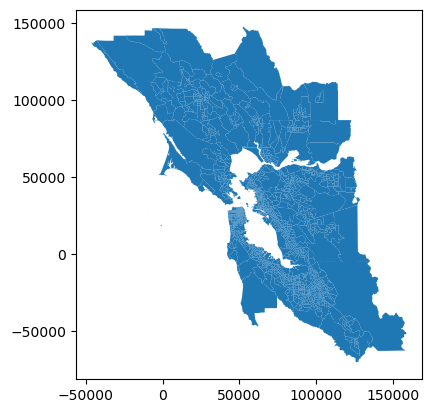

In [10]:
census_track1=census_track.to_crs(epsg=7131)
census_track1.plot()

In [11]:
# read the alamedo boundary shape file
study_bd=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp")
study_bd

,county,fipsstco,objectid,geometry
0,Alameda,06001,1.0,"MULTIPOLYGON (((-122.21496 37.76113, -122.2156..."
1,Contra Costa,06013,2.0,"MULTIPOLYGON (((-121.95091 38.05392, -121.9505..."
2,Marin,06041,3.0,"MULTIPOLYGON (((-122.86959 38.02140, -122.8711..."
3,Napa,06055,4.0,"POLYGON ((-122.20246 38.68898, -122.20232 38.6..."
4,San Francisco,06075,5.0,"MULTIPOLYGON (((-122.47738 37.81103, -122.4763..."
5,San Mateo,06081,6.0,"MULTIPOLYGON (((-122.50248 37.70813, -122.4977..."
6,Santa Clara,06085,7.0,"MULTIPOLYGON (((-122.02427 37.46094, -122.0203..."
7,Solano,06095,8.0,"MULTIPOLYGON (((-122.01053 38.09290, -122.0110..."
8,Sonoma,06097,9.0,"MULTIPOLYGON (((-123.53354 38.76841, -123.5333..."


In [12]:
# lets consider only Alameda for now
sf_bd=study_bd.loc[study_bd['county']=='Alameda']
sf_bd1=gpd.GeoDataFrame.explode(sf_bd)
sf_bd1

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1682995954.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_bd1=gpd.GeoDataFrame.explode(sf_bd)


county fipsstco  objectid  \
0 0  Alameda    06001       1.0   
  1  Alameda    06001       1.0   
  2  Alameda    06001       1.0   
  3  Alameda    06001       1.0   
  4  Alameda    06001       1.0   

                                              geometry  
0 0  POLYGON ((-122.21496 37.76113, -122.21568 37.7...  
  1  POLYGON ((-122.23618 37.74913, -122.23658 37.7...  
  2  POLYGON ((-122.24598 37.77893, -122.24778 37.7...  
  3  POLYGON ((-122.08417 37.50584, -122.08207 37.5...  
  4  POLYGON ((-122.28758 37.76483, -122.28898 37.7...

In [13]:
sf_bd1.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot: >

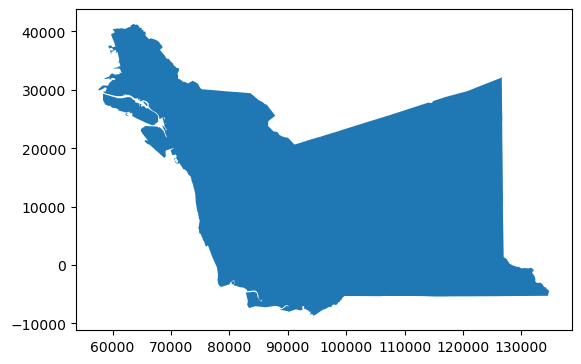

In [14]:
sf_bd_proj = sf_bd.to_crs(epsg=7131)
sf_bd_proj.plot()

In [15]:
sf_bd_proj

,county,fipsstco,objectid,geometry
0,Alameda,06001,1.0,"MULTIPOLYGON (((68710.996 25261.251, 68647.672..."


In [16]:
sf_bd_proj['area']=sf_bd_proj['geometry'].area*3.861e-7 # mile square
sf_bd_proj

,county,fipsstco,objectid,geometry,area
0,Alameda,06001,1.0,"MULTIPOLYGON (((68710.996 25261.251, 68647.672...",744.319461


In [17]:
xmin,ymin,xmax,ymax = sf_bd_proj.total_bounds
width = (xmax-xmin)/2
height = (ymax-ymin)/1
rows = int(np.ceil((ymax-ymin) / height))
cols = int(np.ceil((xmax-xmin) / width))
XleftOrigin = xmin
XrightOrigin = xmin + width
YtopOrigin = ymax
YbottomOrigin = ymax - height
polygons = []

In [18]:
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame({'geometry':polygons})
grid

,geometry
0,"POLYGON ((57556.777 41310.623, 96148.618 41310..."
1,"POLYGON ((96148.618 41310.623, 134740.458 4131..."


C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\2233281025.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:7131
Right CRS: None

  gn1=gpd.clip(sf_bd_proj,grid.iloc[[0]])
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

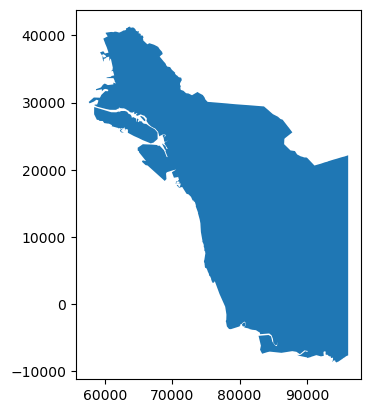

In [19]:
gn1=gpd.clip(sf_bd_proj,grid.iloc[[0]])
gn1.plot()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\2946323700.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:7131
Right CRS: None

  gn2=gpd.clip(sf_bd_proj,grid.iloc[[1]])
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

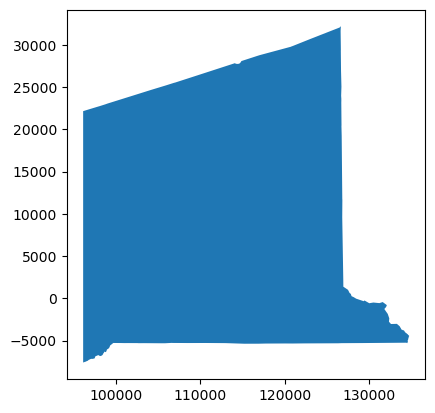

In [20]:
gn2=gpd.clip(sf_bd_proj,grid.iloc[[1]])
gn2.plot()

In [21]:
sf_area=sf_bd_proj[['area']].values
sf_area

array([[744.31946096]])

In [22]:
# Convert to geodataframe
#abnormal_slope1=abnormal_slope.set_crs(epsg=4326)
#abnormal_slope2=abnormal_slope1.to_crs(epsg=7131)
barea_all2 = gpd.GeoDataFrame(barea_all1, crs="EPSG:4326", geometry='geometry')
barea_all3=barea_all2.to_crs(epsg=7131)
barea_all3.head()

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
0,111276,-121.957493,37.523942,13,-121.957218,37.523963,13,{31439803},tertiary,0,...,?,4,0,0,3,0,24.398252,0.000000,"LINESTRING (91536.677 -976.326, 91560.948 -973...",121.991261
1,162454,-121.769183,37.314641,110,-121.768341,37.314766,113,{93291777},tertiary,0,...,?,4,1,0,1,0,75.902661,3.952431,"LINESTRING (108350.827 -24102.437, 108425.349 ...",407.597287
2,165633,-121.922774,37.323369,36,-121.922347,37.323363,36,{184388728},primary,0,...,?,4,1,0,1,0,37.835842,0.000000,"LINESTRING (94730.324 -23220.754, 94768.157 -2...",189.179208
3,888344,-122.246418,37.780160,5,-122.246403,37.780167,5,{53726448},tertiary,0,...,?,4,1,0,1,0,1.539394,0.000000,"LINESTRING (65934.473 27367.107, 65935.819 273...",7.696969
4,923150,-122.519252,38.054330,11,-122.519294,38.054334,11,{655711604},residential,0,...,?,1,0,0,0,0,3.697954,0.000000,"LINESTRING (41921.847 57781.540, 41918.170 577...",7.395908


In [23]:
# Now lets crop the alameda area of lTS network
sf_lts=gpd.clip(barea_all3,gn2)
sf_lts.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
206551,22017,-121.561892,37.508614,986,-121.565637,37.506744,891,{6320129},residential,0,...,?,1,0,1,1,0,665.759004,14.269428,"LINESTRING (126523.711 -2420.971, 126509.296 -...",3461.946823
173071,22003,-121.561892,37.508614,986,-121.561840,37.508618,986,{6320129},residential,0,...,?,1,1,1,1,0,4.597463,0.000000,"LINESTRING (126523.711 -2420.971, 126528.278 -...",9.194926
486398,22165,-121.564827,37.537439,655,-121.561530,37.534033,660,{61352200},tertiary,0,...,?,4,0,4,0,0,482.115817,1.037095,"LINESTRING (126234.059 775.964, 126262.994 727...",2410.579085
224968,22867,-121.638730,37.579786,729,-121.638683,37.579685,728,{1035874814},residential,0,...,?,1,0,1,1,0,12.048485,8.299799,"LINESTRING (119661.623 5417.268, 119665.873 54...",62.652121
354642,22996,-121.638730,37.579786,729,-121.638824,37.580251,722,{1035874814},residential,0,...,?,1,1,1,1,0,52.171967,13.417167,"LINESTRING (119661.623 5417.268, 119656.315 54...",271.294229


In [24]:
sf_lts.groupby(['FT_BIKE_IN']).count()

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
FT_BIKE_IN,,,,,,,,,,,,,,,,,,,,,
0,12675,12675,12675,12675,12675,12675,12675,12675,12675,12675,...,12675,12675,12675,12675,12675,12675,12675,12675,12675,12675
lane,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,...,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267
path,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,...,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254
sharrow,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
track,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [25]:
sf_lts.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
# Convert the LTS shape file to graph to run the 
sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)
sf_lts_g1 =momepy.gdf_to_nx(sf_lts_g, approach='primal')

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1286791951.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)


In [27]:
#  f, ax = plt.subplots(1, 3, figsize=(18, 10), sharex=True, sharey=True)
#  sf_lts.plot(color='#e32e00', ax=ax[0])
#  for i, facet in enumerate(ax):
#      facet.set_title(("Streets", "Primal graph", "Overlay")[i])
#      facet.axis("off")
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[1], node_size=0.01)
# # sf_lts.plot(color='#e32e00', ax=ax[2], zorder=-1)
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[2], node_size=0.01)

<AxesSubplot: >

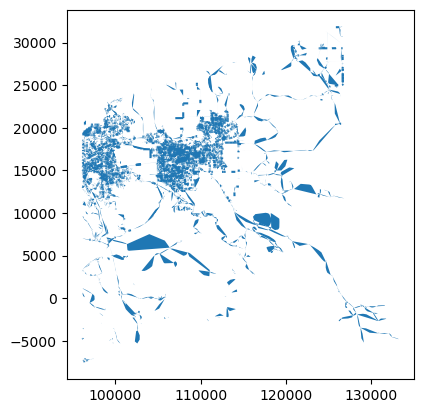

In [28]:
sf_lts['geometry'].convex_hull.plot()

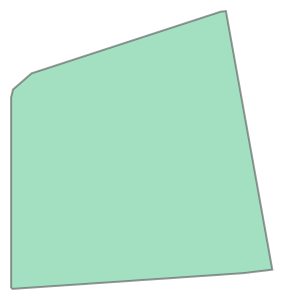

In [29]:
# Get the Convex Hull of the network
convex_hull_area = sf_lts.unary_union.convex_hull
# Show output
convex_hull_area

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

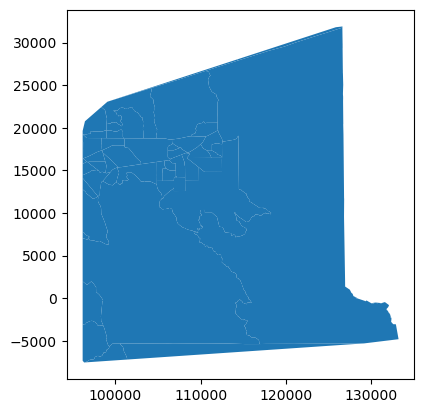

In [30]:
census_track2_sf=gpd.clip(census_track1,convex_hull_area)
census_track2_sf.plot()

In [31]:
convex_hull_area1=convex_hull_area.area
convex_hull_area1

1144979144.6508226

In [32]:
# Calculate the number of Intersections
crossroad_nodes = [node for node in sf_lts_g1.nodes() if len(sf_lts_g1.edges(node)) > 2]


In [33]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

#print("Number of elements in the list: ", get_number_of_elements(list_c))

In [34]:
# Number of intersections where edge>2
NI=get_number_of_elements(crossroad_nodes)
NI

6351

# Calculate the Connectivity for bike network

In [35]:
sf_lts['FT_BIKE_IN'].unique()

array(['0', 'path', 'lane', 'sharrow', 'track'], dtype=object)

In [36]:
sf_lts.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

FT_SEG_STR
0      0.365667
1    774.641137
2      1.036949
3    179.570628
4    261.737963
Name: length, dtype: float64

<AxesSubplot: >

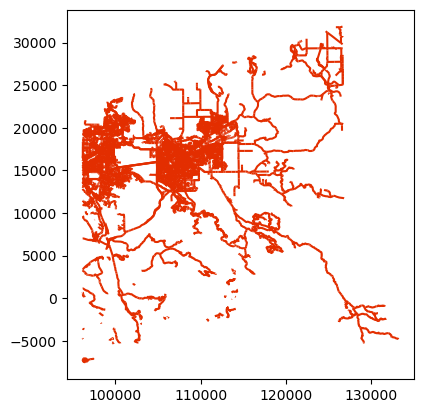

In [37]:
# Get the motorway network and bike network based on functional class of the roads
#sf_motor_network=sf_lts[sf_lts['BIKE_LANE_'].isna()]
sf_motor_network=sf_lts
# Plot the motor Network
sf_motor_network.plot(color='#e32e00')

In [38]:
sf_motor_network.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

FT_SEG_STR
0      0.365667
1    774.641137
2      1.036949
3    179.570628
4    261.737963
Name: length, dtype: float64

In [39]:
sf_motor_network['length'].sum()*0.000621371

1217.352343283869

<AxesSubplot: >

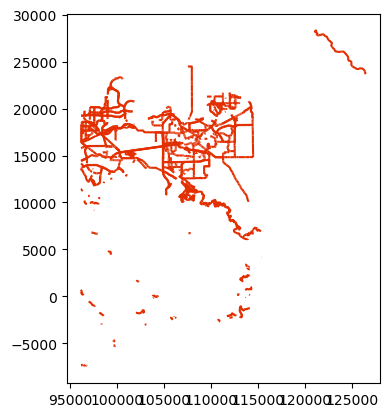

In [40]:
# Plot the Bike Network
sf_bike_network=sf_lts.loc[sf_lts['FT_BIKE_IN']!='0']
sf_bike_network.plot(color='#e32e00')

In [41]:
sf_bike_network.groupby(['FT_SEG_STR'])['length'].sum()*0.000621371

FT_SEG_STR
0      0.365667
1    134.749759
2      1.036949
3    168.609509
4     35.110735
Name: length, dtype: float64

In [42]:
sf_bike_network['length'].sum()*0.000621371

339.8726179704941

In [43]:
sf_lts.shape, sf_bike_network.shape, sf_motor_network.shape

((17257, 35), (4582, 35), (17257, 35))

In [44]:
sf_bike_network.tail()

,ROAD_ID,start_lon,start_lat,starting_e,end_lon,end_lat,ending_ele,osmid,FUNCTIONAL,PATH_ID,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,length,slope,geometry,impedance_of_link
75887,520586,-121.861800,37.741432,165,-121.861420,37.741442,164,{645476381},tertiary,0,...,?,3,1,0,0,0,33.734231,2.964348,"LINESTRING (99844.550 23211.900, 99860.401 232...",147.418588
309255,602744,-121.861394,37.741512,165,-121.861822,37.741507,165,{1018985068},tertiary,0,...,?,3,0,0,1,0,37.972558,0.000000,"LINESTRING (99880.254 23220.982, 99866.696 232...",151.890234
335163,579149,-121.853945,37.741271,215,-121.853412,37.740604,219,{818089651},tertiary,0,...,?,3,1,3,1,0,87.736157,4.559124,"LINESTRING (100537.009 23198.399, 100545.466 2...",456.228019
166231,457675,-121.880294,37.712882,117,-121.878871,37.712593,116,{6367785},secondary,0,...,?,3,0,0,1,0,131.871520,0.758314,"LINESTRING (98233.685 20032.964, 98264.723 200...",527.486081
75838,505832,-121.878934,37.712725,117,-121.880206,37.712992,117,{128126419},secondary,0,...,?,3,1,0,0,0,118.017791,0.000000,"LINESTRING (98353.736 20016.324, 98336.251 200...",472.071164


In [45]:
def node_level_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    # Alameda network is really big and desnse, we stop algorithm in 1 mile while allowing max slope factor 1.2
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=9976, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_sheortst_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # We will consider no connection means infinite distance, therefore replace all zero distance with inf
    sf_sheortst_path_motor_length1 = sf_sheortst_path_motor_length.replace(0, np.inf)
    sf_sheortst_path_motor_length2 = sf_sheortst_path_motor_length1.replace(np.NaN, np.inf)
    # take the reciprocal of distance
    sf_sheortst_path_motor_length_reciprocal=1/sf_sheortst_path_motor_length2
    # Calculate the total reciprocal distance
    sf_sheortst_path_motor_length_reciprocal['node_complete_network_path_reciprocal_sum']=sf_sheortst_path_motor_length_reciprocal.sum(numeric_only=True, axis=0)
    sf_sheortst_path_motor_length_reciprocal1=sf_sheortst_path_motor_length_reciprocal[['node_complete_network_path_reciprocal_sum']]
    #sf_sheortst_path_motor_length1
    # make total motor path as dictonary
    ms_outcomes=sf_sheortst_path_motor_length_reciprocal1.T.to_dict('list')
    ms_outcomes
    # # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_motor_g1, values=ms_outcomes, name="node_complete_network_path_reciprocal_sum")
    nodes_motor, edges_motor = momepy.nx_to_gdf(sf_lts_motor_g1)
    nodes_motor['node_complete_network_path_reciprocal_sum'] = nodes_motor['node_complete_network_path_reciprocal_sum'].str[0]


    # do it for bike Path or low-stress path
    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=9976, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # We will consider no connection means infinite distance, therefore replace all zero and NaN distance with inf
    sf_shortest_path_bike_length1 =  sf_shortest_path_bike_length.replace(0, np.inf)
    sf_shortest_path_bike_length2 = sf_shortest_path_bike_length1.replace(np.NaN, np.inf)
    # take the reciprocal of distance
    sf_shortest_path_bike_length_reciprocal=1/sf_shortest_path_bike_length2
    # Calculate the total reciprocal distance
    sf_shortest_path_bike_length_reciprocal['bike_or_low_stress_path_reciprocal_sum']=sf_shortest_path_bike_length_reciprocal.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length_reciprocal1=sf_shortest_path_bike_length_reciprocal[['bike_or_low_stress_path_reciprocal_sum']]
    # make total motor path as dictonary
    bs_outcomes=sf_shortest_path_bike_length_reciprocal1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_bike_g1, values=bs_outcomes, name="bike_or_low_stress_path_reciprocal_sum")
    nodes_bike, edges_bike = momepy.nx_to_gdf(sf_lts_bike_g1)
    nodes_bike['bike_or_low_stress_path_reciprocal_sum'] = nodes_bike['bike_or_low_stress_path_reciprocal_sum'].str[0]

    #connectivity score
    shortest_path=pd.merge(nodes_motor,nodes_bike,on=['geometry'],how='outer')
    shortest_path=shortest_path.fillna(0)
    shortest_path['CS']= (shortest_path['bike_or_low_stress_path_reciprocal_sum'])/(shortest_path['node_complete_network_path_reciprocal_sum'])
    # The connectivity score will always varied from zero to one, however, due to missing link in complete network can get the CS more than one, therefore, we will limit this one to avoid any unexpected error
    shortest_path['CS'] = shortest_path['CS'].clip(upper=1)
    #shortest_path1= shortest_path1.replace(np.inf, 1)
    return shortest_path

In [46]:
# define grade of connectivity
def count_census_block(Connectivity_score):
    if Connectivity_score>=0.80:
        return 'excellently connected'
    elif (Connectivity_score>=0.60 and Connectivity_score<0.80):
        return 'very well connected  '
    elif (Connectivity_score>=0.40 and Connectivity_score<0.60):
        return 'well connected'
    elif (Connectivity_score>=0.20 and Connectivity_score<0.40):
        return 'fairly connected'
    else:
        return 'poorly connected'

In [47]:
al_connectivity=node_level_connectivity_score (sf_motor_network,sf_bike_network)
al_connectivity.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1636920687.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1636920687.py:29: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,node_complete_network_path_reciprocal_sum,nodeID_x,geometry,bike_or_low_stress_path_reciprocal_sum,nodeID_y,CS
0,0.109146,0,POINT (126523.711 -2420.971),0.0,0.0,0.0
1,0.000577,1,POINT (126194.480 -2631.555),0.0,0.0,0.0
2,0.109145,2,POINT (126528.278 -2420.439),0.0,0.0,0.0
3,0.005613,3,POINT (126234.059 775.964),0.0,0.0,0.0
4,0.001556,4,POINT (126529.053 400.674),0.0,0.0,0.0


In [48]:
# overall Area Connectivity
BMN_Area_CS=al_connectivity['bike_or_low_stress_path_reciprocal_sum'].sum()/al_connectivity['node_complete_network_path_reciprocal_sum'].sum()
BMN_Area_CS

0.06963092808710765

In [49]:
al_connectivity['CS'].median()

0.0

In [50]:
# Save the Alamenda County node level Connectivity
crs = {'init': 'epsg:7131'}
gdf_al = gpd.GeoDataFrame(al_connectivity, crs=crs, geometry = 'geometry')
gdf_al.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Alameda_BMN_node_level_connectivity.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\2861637936.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_al.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Alameda_BMN_node_level_connectivity.shp")


In [51]:
input_census_tract=census_track2_sf.reset_index()
input_census_tract.shape

(53, 18)

In [52]:
def census_node_level_connectivity_score (sf_connectivity,input_census_tract):
    census_score=gpd.sjoin(sf_connectivity,input_census_tract)
    census_score1=pd.DataFrame({'Meadian CS':census_score.groupby(['GISJOIN'])['CS'].median()}).reset_index()
    census_score2=pd.merge(census_score1,input_census_tract, on=['GISJOIN'], how='inner' )
    return census_score2 

In [53]:
# save the results by Census Tract
CS_median=census_node_level_connectivity_score (al_connectivity,input_census_tract)
CS_median.head()

,GISJOIN,Meadian CS,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600010443103,1.00000,314,06,001,443103,06001443103,4431.03,Census Tract 4431.03,G5020,S,16687132.0,0.0,+37.5270917,-121.9015820,18997.315306,18997.315306,1.668713e+07,"POLYGON ((98133.724 -3229.597, 98103.248 -3234..."
1,G0600010443200,0.00000,317,06,001,443200,06001443200,4432,Census Tract 4432,G5020,S,14504923.0,0.0,+37.4877231,-121.8955045,15504.399163,15504.399163,1.450493e+07,"POLYGON ((98702.685 -3552.915, 98777.150 -3814..."
2,G0600010443301,0.18758,318,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1556732.0,0.0,+37.4707721,-121.9130472,6757.851197,6757.851197,1.556731e+06,"POLYGON ((96164.877 -7321.313, 96174.515 -7335..."
3,G0600010450101,0.00000,330,06,001,450101,06001450101,4501.01,Census Tract 4501.01,G5020,S,1811639.0,0.0,+37.7050855,-121.8851378,6992.170898,6992.170898,1.811643e+06,"POLYGON ((98966.203 19690.363, 98965.919 19621..."
4,G0600010450102,0.00000,331,06,001,450102,06001450102,4501.02,Census Tract 4501.02,G5020,S,9584945.0,0.0,+37.7208239,-121.8911825,12392.276091,12392.276091,9.584940e+06,"POLYGON ((98962.230 20419.925, 98963.950 20312..."


In [54]:
# Import the node Connectivity
crs = {'init': 'epsg:7131'}
CS_median1 = gpd.GeoDataFrame(CS_median, crs=crs, geometry = 'geometry')
CS_median1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Alameda_Census_level_Median_BMN_CS.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Assign the Grade of the Connectivity for Bike Network-micro connectivity

In [55]:
CS_median['cs_ranking']=CS_median.apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected     1
fairly connected          2
poorly connected         46
well connected            1
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for Bike Network-macro connectivity

In [56]:
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(al_connectivity,input_census_tract)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['bike_or_low_stress_path_reciprocal_sum'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['node_complete_network_path_reciprocal_sum'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
fairly connected          4
poorly connected         44
very well connected       2
Name: GISJOIN, dtype: int64

# Calculate the connectivity for Low stress network

<AxesSubplot: >

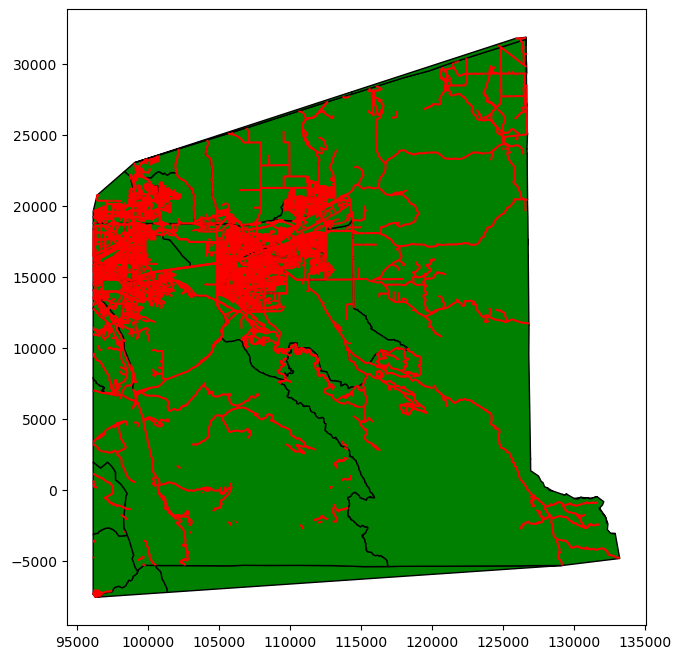

In [57]:
fig, ax = plt.subplots(figsize = (8,8)) 
census_track2_sf.plot(ax=ax,color="green",edgecolor='k')
sf_lts.geometry.plot(color="red",edgecolor='k',ax=ax)

In [58]:
input_census_tract=census_track2_sf.reset_index()
input_census_tract.shape

(53, 18)

In [59]:
# Split the network as low network to get the connectivity 
sf_motor_network_op2=sf_motor_network
sf_low_stress_network_op2=sf_lts.loc[sf_lts['FT_SEG_STR']<3]

In [60]:
node_level_MLN_CS= node_level_connectivity_score(sf_motor_network_op2,sf_low_stress_network_op2)
node_level_MLN_CS.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1636920687.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\1636920687.py:29: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,node_complete_network_path_reciprocal_sum,nodeID_x,geometry,bike_or_low_stress_path_reciprocal_sum,nodeID_y,CS
0,0.109146,0,POINT (126523.711 -2420.971),0.109146,0.0,1.0
1,0.000577,1,POINT (126194.480 -2631.555),0.000577,1.0,1.0
2,0.109145,2,POINT (126528.278 -2420.439),0.109145,2.0,1.0
3,0.005613,3,POINT (126234.059 775.964),0.000000,0.0,0.0
4,0.001556,4,POINT (126529.053 400.674),0.000000,0.0,0.0


In [61]:
# overall Area Connectivity
LMN_Area_CS=node_level_MLN_CS['bike_or_low_stress_path_reciprocal_sum'].sum()/node_level_MLN_CS['node_complete_network_path_reciprocal_sum'].sum()
LMN_Area_CS

0.2770661589836355

In [62]:
node_level_MLN_CS['CS'].median()

0.28584233862868574

In [63]:
# Import the node Connectivity
crs = {'init': 'epsg:7131'}
sfcs1 = gpd.GeoDataFrame(node_level_MLN_CS, crs=crs, geometry = 'geometry')
sfcs1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/AL_node_level_MLN_CS.shp")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7540\3578746851.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sfcs1.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/AL_node_level_MLN_CS.shp")


In [64]:
CS_median1=census_node_level_connectivity_score (node_level_MLN_CS,input_census_tract)
CS_median1.head()

,GISJOIN,Meadian CS,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600010443103,1.000000,314,06,001,443103,06001443103,4431.03,Census Tract 4431.03,G5020,S,16687132.0,0.0,+37.5270917,-121.9015820,18997.315306,18997.315306,1.668713e+07,"POLYGON ((98133.724 -3229.597, 98103.248 -3234..."
1,G0600010443200,0.573457,317,06,001,443200,06001443200,4432,Census Tract 4432,G5020,S,14504923.0,0.0,+37.4877231,-121.8955045,15504.399163,15504.399163,1.450493e+07,"POLYGON ((98702.685 -3552.915, 98777.150 -3814..."
2,G0600010443301,0.000000,318,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1556732.0,0.0,+37.4707721,-121.9130472,6757.851197,6757.851197,1.556731e+06,"POLYGON ((96164.877 -7321.313, 96174.515 -7335..."
3,G0600010450101,0.264195,330,06,001,450101,06001450101,4501.01,Census Tract 4501.01,G5020,S,1811639.0,0.0,+37.7050855,-121.8851378,6992.170898,6992.170898,1.811643e+06,"POLYGON ((98966.203 19690.363, 98965.919 19621..."
4,G0600010450102,0.470330,331,06,001,450102,06001450102,4501.02,Census Tract 4501.02,G5020,S,9584945.0,0.0,+37.7208239,-121.8911825,12392.276091,12392.276091,9.584940e+06,"POLYGON ((98962.230 20419.925, 98963.950 20312..."


In [65]:
# Import the node Connectivity
# crs = {'init': 'epsg:7131'}
# CS_median2 = gpd.GeoDataFrame(CS_median1, crs=crs, geometry = 'geometry')
# CS_median2.to_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/AL_census_level_MLN_CS.shp")

# Assign the Grade of the Connectivity for low Stress Network-micro connectivity

In [66]:
CS_median1 ['cs_ranking']=CS_median1 .apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median1.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected     3
fairly connected         19
poorly connected         15
very well connected       1
well connected           12
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for low stress Network-macro connectivity

In [67]:
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(node_level_MLN_CS,input_census_tract)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['bike_or_low_stress_path_reciprocal_sum'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['node_complete_network_path_reciprocal_sum'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected     2
fairly connected         21
poorly connected         15
very well connected       1
well connected           11
Name: GISJOIN, dtype: int64

# end of the Code